# **Generating Data - Simple Plots and Statistics**

# **Numeric:** ``from fxy.n import *``

In [1]:
import mpmath as mp
from mpmath import *
mp.dps = 80

In [2]:
print(pi)

3.141592653589793238462643383279502884197169399375105820974944592307816406286209


In [3]:
sin(pi/2)

mpf('1.0')

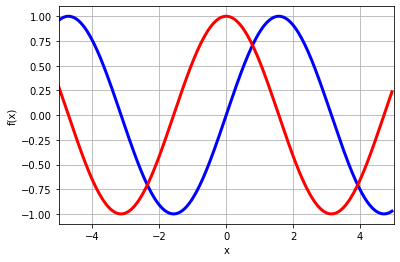

In [4]:
mp.plot([sin, cos])

# **Symbolic:** ``from fxy.s import *``

In [5]:
import sympy
exec(sympy.interactive.session.preexec_source)
print(sympy.interactive.session.preexec_source)

from __future__ import division
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing()



In [6]:
f = x**(x**(-1))

In [7]:
f

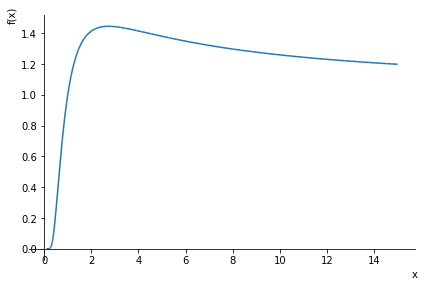

In [8]:
plot(f, (x, 0.1, 15))

In [9]:
g = x**2 - y**2

In [10]:
g

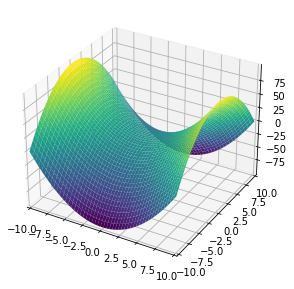

In [11]:
plotting.plot3d(g);

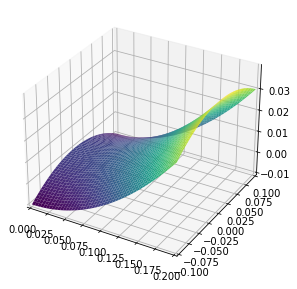

In [12]:
plotting.plot3d(g, (x, 0, 0.2), (y, -0.1, 0.1))

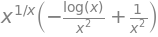

In [13]:
diff(f, x)

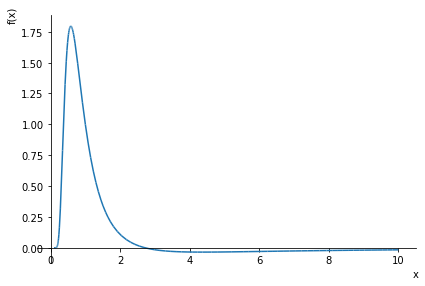

In [14]:
plot(diff(f, x), (x, 0.1, 10))

# **Actuarial:** ``from fxy.a import *``

In [15]:
import numpy as np # Numeric Arrays
import pandas as pd # Series and Dataframes
import scipy as sp # Scientific imports
import scipy.stats as st # Statistical Distributions
import statsmodels.api as sm # Statsmodels
import statsmodels.formula.api as smf

In [16]:
class Entity():
    pass

my = Entity()

## **Random Draw (Sampling from a Population)**

In [17]:
# Let's say we have a population
my.population = np.arange(1, 15, 1)

In [18]:
my.population

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [19]:
# Random Sampling with Replacement:
sp.random.choice(my.population, size=10, replace=True, p=None)

array([13,  9,  7,  1,  1,  7,  3,  5,  6, 11])

In [20]:
# Random Sampling without Replacement:
sp.random.choice(my.population, size=10, replace=False, p=None)

array([13,  8,  4,  7,  1,  5,  3, 14,  6, 12])

In [21]:
# Random Sampling according to a Set of Probabilities (multinomial)
probs = [0.4, 0.3, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0];
np.random.choice(my.population, size=10, replace=True, p=probs)

array([1, 1, 1, 3, 3, 1, 1, 4, 2, 3])

## **Sampling from Distributions**

In [22]:
# Drawing 10 items from Normal distribution with mean=5 and sd=2
np.random.seed(10)
2*np.random.randn(10)+5

array([7.66317301, 6.43055795, 1.90919942, 4.9832323 , 6.24267195,
       3.55982888, 5.53102317, 5.21709705, 5.00858286, 4.65079958])

In [23]:
sp.random.seed(10)
sp.random.normal(5,2,10)

array([7.66317301, 6.43055795, 1.90919942, 4.9832323 , 6.24267195,
       3.55982888, 5.53102317, 5.21709705, 5.00858286, 4.65079958])

In [24]:
# Generating DataFrame of random variable instantiations
my.df = pd.DataFrame({'Laplace': sp.random.laplace(0,1,100),
                'Poisson': sp.random.poisson(1,100),
                'Uniform': sp.random.uniform(0,3,100),
                'Bernoulli': st.bernoulli.rvs(0.5,size=100)})
my.df.head()

,Laplace,Poisson,Uniform,Bernoulli
0,0.981475,0,1.446216,1
1,0.254960,0,1.586562,1
2,0.586107,0,2.088925,1
3,-0.538279,0,0.614285,1
4,1.805138,1,2.014117,0


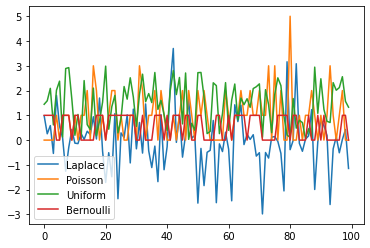

In [25]:
# Visualizing the variables
my.df.plot();

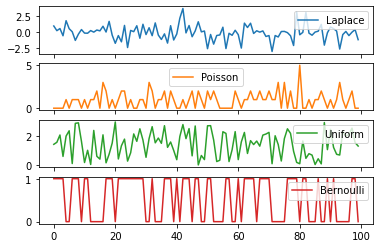

In [26]:
# Visualizing variables separately
my.df.plot(subplots=True);

## **Constructing data according to Laws**

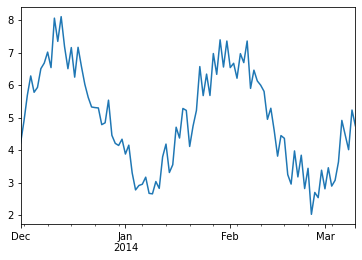

In [27]:
# Series of addition f Normal distribution with mean=5, sd=0.5 to a 2*sine(x) function
my.series = pd.Series(
    data=2*np.sin(np.linspace(0,4*np.pi,100))+(0.5*np.random.randn(100)+5),
    index=pd.date_range('2013-12-01',periods=100,freq='D')
)

my.series.plot();

## **Finding CDF and PDF values**

In [28]:
# Normal Distribution PDF
st.norm.pdf(0)

In [29]:
# Normal Distribution CDF
st.norm.cdf(0)

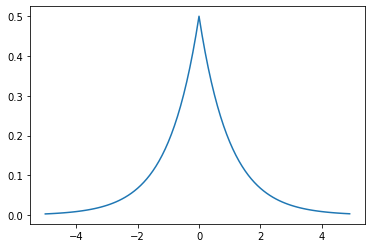

In [30]:
# Plotting Laplace Density:
x_vals = np.arange(-5,5,0.1)
y_vals = st.laplace.pdf(x_vals,0)

pd.Series(y_vals, x_vals).plot();

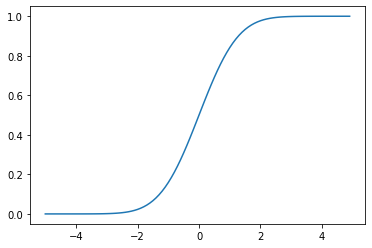

In [31]:
# Plotting Normal distribution: X ~ N(0,1) CDF
pd.Series(st.norm.cdf(x_vals, 0, 1), x_vals).plot();

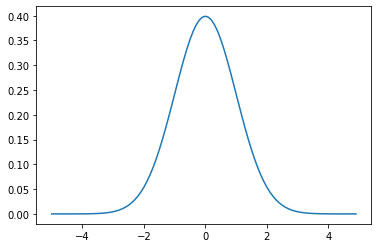

In [32]:
# Plotting Normal distribution: X ~ N(0,1) PDF
pd.Series(st.norm.pdf(x_vals, 0, 1), x_vals).plot();

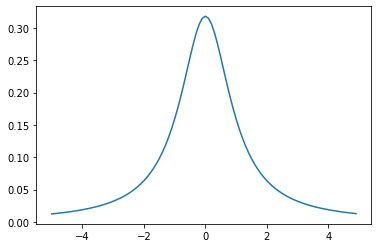

In [33]:
# Let's also draw Cauchy distribution.
pd.Series(st.cauchy.pdf(x_vals,0),x_vals).plot();

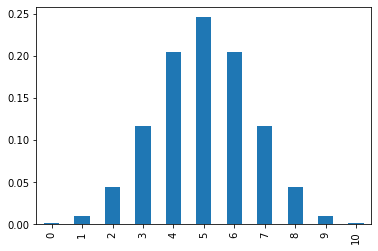

In [34]:
# Plotting Binomial probabilities: X ~ Binom(k,10,0.5)       # ↙ Note: (0, 11, 1), not (0, 10, 1)
k_vals = np.arange(0, 11, 1) 
f_vals = pd.Series(st.binom.pmf(k_vals, 10, 0.5), k_vals)
pd.Series(f_vals, k_vals).plot(kind='bar');

In [35]:
# The binomial probabilities should sum to one.
f_vals.sum()

## **Plotting a Correlation Matrix**

In [36]:
import statsmodels.api as sm

In [37]:
my.df.corr()

,Laplace,Poisson,Uniform,Bernoulli
Laplace,1.000000,-0.065446,-0.020379,0.132393
Poisson,-0.065446,1.000000,0.039870,-0.128527
Uniform,-0.020379,0.039870,1.000000,0.108047
Bernoulli,0.132393,-0.128527,0.108047,1.000000


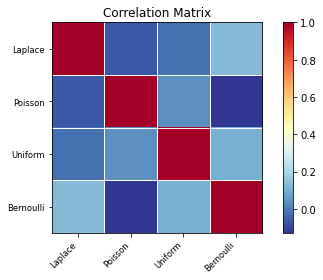

In [38]:
sm.graphics.plot_corr(my.df.corr(), xnames=list(my.df.columns));

## Ordinary Least Squares

In [39]:
# Regression (OLS)
my.OLS = smf.ols('Uniform ~ Laplace + Poisson + Bernoulli', my.df).fit()
my.OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Uniform   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.5091
Date:                Fri, 05 Mar 2021   Prob (F-statistic):              0.677
Time:                        16:14:12   Log-Likelihood:                -127.06
No. Observations:                 100   AIC:                             262.1
Df Residuals:                      96   BIC:                             272.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2828      0.164      7.804      0.000       0.957       1.609
Laplace       -0.0242      0.076     -0.320      0.750      -0.174       0.126
Poisson        0.0479      0.092      0.519      0.605      -0.135       0.231
Bernoulli      0.2082      0.180      1.158      0.250      -0.149       0.565
==============================================================================
Omnibus:                       33.897   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.085
Skew:                          -0.065   Prob(JB):                       0.0477
Kurtosis:                       1.799   Cond. No.                         4.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic Regression

In [40]:
# Regression (Logit)
my.Logit = smf.logit('Bernoulli ~ Laplace + Poisson + Uniform', my.df).fit()
my.Logit.summary()

Optimization terminated successfully.
         Current function value: 0.664879
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Bernoulli   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Fri, 05 Mar 2021   Pseudo R-squ.:                 0.03380
Time:                        16:14:12   Log-Likelihood:                -66.488
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                    0.1991
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0693      0.436      0.159      0.874      -0.785       0.923
Laplace        0.2310      0.182      1.269      0.204      -0.126       0.588
Poisson       -0.2758      0.221     -1.246      0.213      -0.709       0.158
Uniform        0.2804      0.239      1.174      0.240      -0.188       0.748
==============================================================================
"""

## Generalized Linear Model with Logit Link Function

In [41]:
# GLM fitting (via Logit)
my.GLM = smf.glm('Bernoulli ~ Laplace + Poisson + Uniform', my.df, \
                family = sm.families.Binomial(sm.families.links.logit())).fit()
my.GLM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Bernoulli   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66.488
Date:                Fri, 05 Mar 2021   Deviance:                       132.98
Time:                        16:14:12   Pearson chi2:                     99.9
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0693      0.436      0.159      0.874      -0.785       0.923
Laplace        0.2310      0.182      1.269      0.204      -0.126       0.588
Poisson       -0.2758      0.221     -1.246      0.213      -0.709       0.158
Uniform        0.2804      0.239      1.174      0.240      -0.188       0.748
==============================================================================
"""

In [42]:
my.GLM.predict({'Laplace': 0.9, 'Poisson': 2, 'Uniform': 0})

0    0.431829
dtype: float64

## qq-plot

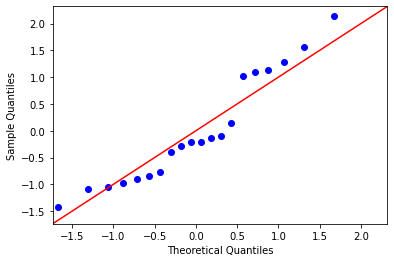

In [43]:
from statsmodels.graphics.gofplots import qqplot

x = np.random.normal(size=20)
y = np.random.normal(size=20)

qqplot(x, line='45', fit=True);

# **Learning:** ``from fxy.l import *``

In [44]:
from fxy.l import *

## Nearst Neighbors

In [45]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [46]:
neigh.predict([[1.1]])

array([0])

In [47]:
neigh.predict_proba([[0.9]])

array([[0.66666667, 0.33333333]])

## Cross-Validation of Classification in SciKit Learn

In [48]:
iris = sklearn.datasets.load_iris()
iris.data.shape, iris.target.shape

In [49]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)

In [50]:
X_train.shape, y_train.shape

In [51]:
X_test.shape, y_test.shape

In [52]:
# Fitting model with the training set
clf = sklearn.svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [53]:
# Comparing it with the testing set
clf.score(X_test, y_test)

# **Plotting:** ``from fxy.p import *``

In [54]:
# Plotting (plt, matplotlib)
from fxy.p import *


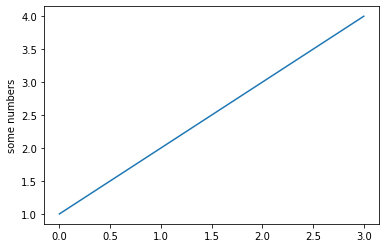

In [55]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

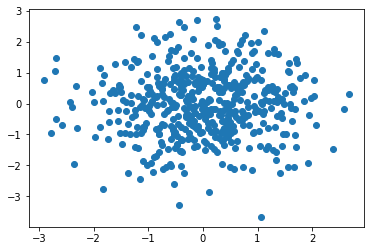

In [56]:
x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.plot(x, y, 'o');
plt.show()